In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import cv2


In [8]:
RGB_SCALE = 255
CMYK_SCALE = 100


def rgb_to_cmyk(img):
    dx, dy, dz = img.shape
    cmykData = np.zeros((dx, dy, 4))
    C = np.zeros((dx, dy))
    M = np.zeros((dx, dy))
    Y = np.zeros((dx, dy))
    K = np.zeros((dx, dy))

    
    for i in range(dx):
        for j in range(dy):
            if img[i,j].any() ==  False:
                cmykData[i,j] = 0, 0, 0, CMYK_SCALE
            else:
                c, m, y = 1 - img[i,j] / RGB_SCALE
                
                # extract out k [0, 1]
                min_cmy = min(c, m, y)
                divosor = (1 - min_cmy)
                c = (c - min_cmy) / divosor
                m = (m - min_cmy) / divosor
                y = (y - min_cmy) / divosor
                k = min_cmy

                # rescale to the range [0,CMYK_SCALE]
                C[i,j] = c * CMYK_SCALE
                M[i,j] = m * CMYK_SCALE
                Y[i,j] = y * CMYK_SCALE
                K[i,j] = k * CMYK_SCALE
                cmykData[i,j] = c * CMYK_SCALE, m * CMYK_SCALE, y * CMYK_SCALE, k * CMYK_SCALE

    return C,M,Y,K,cmykData

In [9]:
masterInpath = 'D:/EntornosPython/imgs/'
imgName = 'cell.png'
img = io.imread(masterInpath + imgName)
img = img[:,:,:3]
print(img.shape)
print(img)

(424, 259, 3)
[[[118 133 148]
  [120 130 140]
  [124 131 140]
  ...
  [128 136 142]
  [125 131 139]
  [118 126 135]]

 [[ 99 106 119]
  [104 104 112]
  [110 109 115]
  ...
  [113 114 118]
  [106 107 112]
  [ 98 100 107]]

 [[103 107 118]
  [108 107 114]
  [116 111 115]
  ...
  [119 119 123]
  [112 111 116]
  [103 103 110]]

 ...

 [[ 89  94 111]
  [ 86  85 102]
  [ 89  86 101]
  ...
  [ 98  96 111]
  [ 94  92 107]
  [ 88  88 104]]

 [[104 112 127]
  [101 104 118]
  [104 105 118]
  ...
  [112 115 129]
  [110 113 128]
  [105 110 126]]

 [[127 140 156]
  [127 135 152]
  [130 136 153]
  ...
  [133 144 160]
  [132 143 160]
  [129 141 159]]]


In [6]:

#img = Image.open(r'D:/EntornosPython/imgs/cell.png')



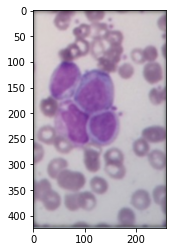

In [10]:
fig, ax = plt.subplots()
plt.imshow(img)

In [11]:
C,M,Y,K,imgCMYK = rgb_to_cmyk(img)
#imgCMYK = np.uint8(imgCMYK)
print(imgCMYK)

[[[20.27027027 10.13513514  0.         41.96078431]
  [14.28571429  7.14285714  0.         45.09803922]
  [11.42857143  6.42857143  0.         45.09803922]
  ...
  [ 9.85915493  4.22535211  0.         44.31372549]
  [10.07194245  5.75539568  0.         45.49019608]
  [12.59259259  6.66666667  0.         47.05882353]]

 [[16.80672269 10.92436975  0.         53.33333333]
  [ 7.14285714  7.14285714  0.         56.07843137]
  [ 4.34782609  5.2173913   0.         54.90196078]
  ...
  [ 4.23728814  3.38983051  0.         53.7254902 ]
  [ 5.35714286  4.46428571  0.         56.07843137]
  [ 8.41121495  6.54205607  0.         58.03921569]]

 [[12.71186441  9.3220339   0.         53.7254902 ]
  [ 5.26315789  6.14035088  0.         55.29411765]
  [ 0.          4.31034483  0.86206897 54.50980392]
  ...
  [ 3.25203252  3.25203252  0.         51.76470588]
  [ 3.44827586  4.31034483  0.         54.50980392]
  [ 6.36363636  6.36363636  0.         56.8627451 ]]

 ...

 [[19.81981982 15.31531532  0.    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


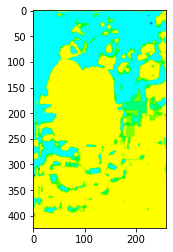

In [12]:
fig, ax = plt.subplots()
plt.imshow(imgCMYK)

In [ ]:
#  bgrdash = bgr.astype(np.float)/255.

#  K = 1 - np.max(bgrdash, axis=2)

#  C = (1-bgrdash[...,2] - K)/(1-K)

#  M = (1-bgrdash[...,1] - K)/(1-K)

#  Y = (1-bgrdash[...,0] - K)/(1-K)

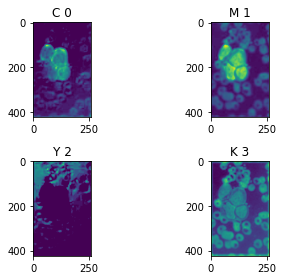

In [13]:
# Split CMYK channels
#Y, M, C, K = cv2.split(mgCMYK)
channels = [C,M,Y,K]
nameChannels = ["C","M","Y","K"]
width=5
height=5
axes=[]
fig=plt.figure()

for a in range(len(channels)):
    b = channels[a]
    axes.append( fig.add_subplot(2,2, a+1) )
    subplot_title=(nameChannels[a]+" "+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()
# Save channels


In [14]:
cv2.imshow('C.jpg', C)
cv2.imshow('M.jpg', M)
cv2.imshow('Y.jpg', Y)
cv2.imshow('K.jpg', K)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# print(Y)
Y_ = np.uint8(Y)
print(Y)
print(Y_)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.86206897 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
#EqualizationHistogram
equ = cv2.equalizeHist(Y_)


#Linear Contrast
linear = (Y_-np.amin(Y_))*((255-0)/(np.amax(Y_)-np.amin(Y_)))
#plt.imshow(equ,cmap='gray')
equ_ = np.float64(equ)
#linear = np.uint8(linear)
ei = (2*linear) + equ_

In [18]:
print(ei)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
print(linear.dtype)
print(equ.dtype)

float64
uint8


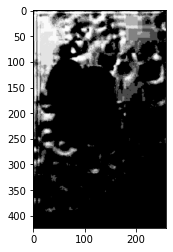

In [22]:
fig, ax = plt.subplots()
plt.imshow(equ,cmap='gray')

In [24]:
ei__ = np.uint8(ei)

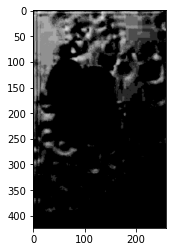

In [26]:
fig, ax = plt.subplots()
plt.imshow(ei,cmap='gray')

In [58]:
print(ei.shape)
print(ei.dtype)


(424, 259)
float64


In [27]:
def minimum_(imgTest,kernel):
    
    imgFiltered = imgTest.copy()

    n , m = imgTest.shape
    nK, mK = kernel.shape
    ptoMiddle = nK//2
    
    for i in range(n - nK + 1):
        for j in range(m - mK + 1):
            slicing = imgTest[i:i+nK, j:j+mK]
            #print(slicing)
            min_ = np.min(slicing)
            imgFiltered[i+ptoMiddle][j+ptoMiddle] = min_
    return imgFiltered

kernel = np.ones((3,3), dtype=np.uint8)  #filtro


In [28]:
print(ei)
print(kernel)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


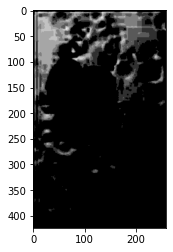

In [29]:
enhancedImg = minimum_(ei,kernel)
fig, ax = plt.subplots()
plt.imshow(enhancedImg,cmap='gray')

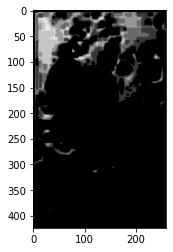

In [30]:
enhancedImg = minimum_(enhancedImg,kernel)
fig, ax = plt.subplots()
plt.imshow(enhancedImg,cmap='gray')

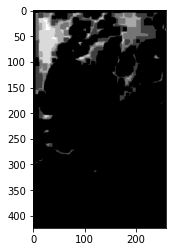

In [31]:
enhancedImg = minimum_(enhancedImg,kernel)
fig, ax = plt.subplots()
plt.imshow(enhancedImg,cmap='gray')

In [33]:
enhancedImg2 = np.uint8(enhancedImg)

In [34]:
ret, thresh1 = cv2.threshold(enhancedImg2, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)     
  
cv2.imshow('Otsu Threshold', thresh1)         
     
cv2.waitKey(0)
cv2.destroyAllWindows()
